<a href="https://colab.research.google.com/github/mitunkantipaul/Image_processing/blob/main/Pork_background_removing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pork_background_removing

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from ipywidgets import interactive
%matplotlib inline


image = cv2.imread('/content/pork_image.jpg')


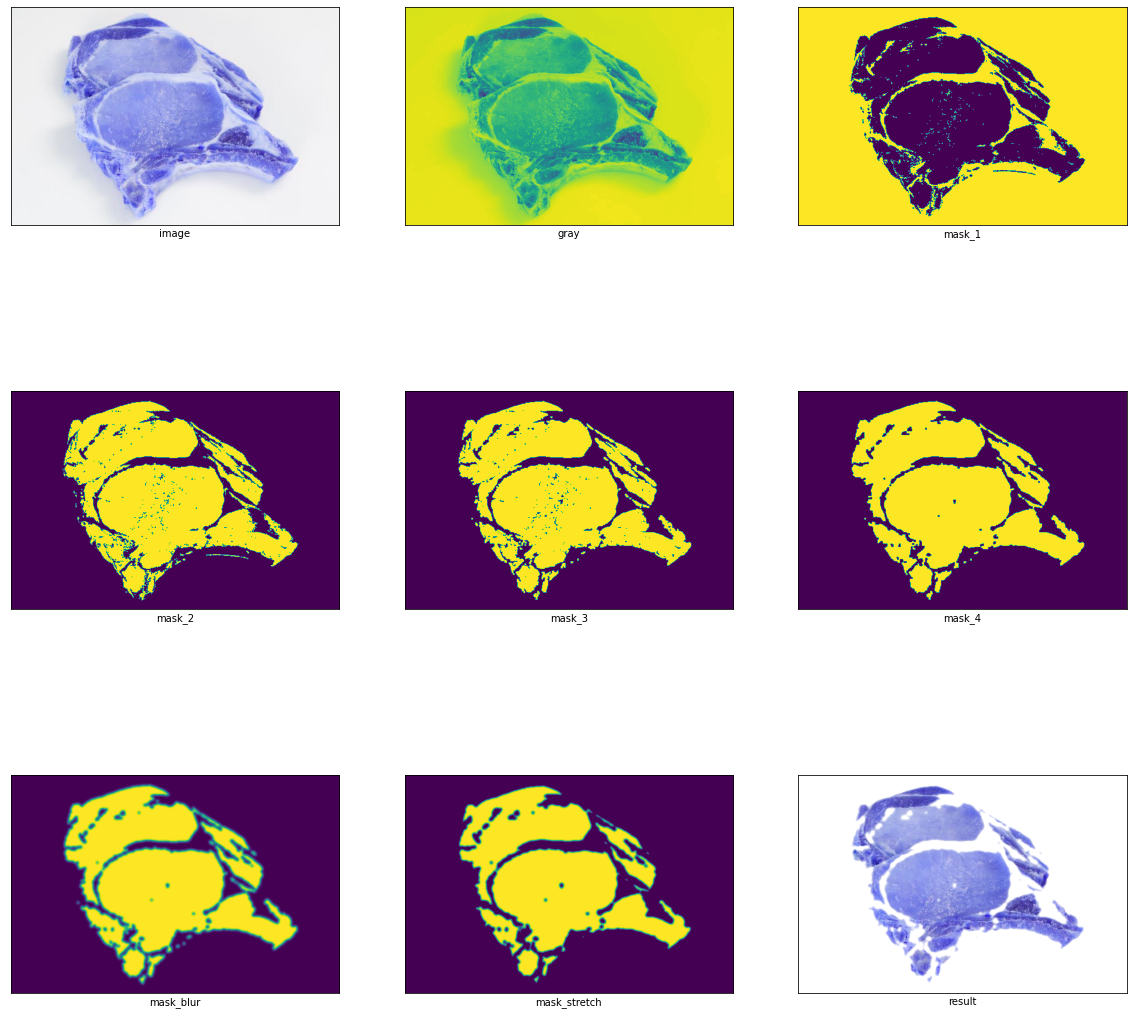

In [17]:

def remove_background(image, threshold=(200, 255)):
  """
  remove background of image

  arguments:
    image:  dtype:array 
    threshold: dtype:tupele

  return:
    result: dtype:array 
    image_dict:

  """
  # convert to graky
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # threshold input image as mask
  mask_1 = cv2.threshold(gray, *threshold, cv2.THRESH_BINARY)[1]

  # negate mask
  mask_2 = 255 - mask_1

  # apply morphology to remove isolated extraneous noise
  # use borderconstant of black since foreground touches the edges
  kernel = np.ones((3,3), np.uint8)
  mask_3 = cv2.morphologyEx(mask_2, cv2.MORPH_OPEN, kernel)

  mask_4 = cv2.morphologyEx(mask_3, cv2.MORPH_CLOSE, kernel)

  # anti-alias the mask -- blur then stretch
  # blur alpha channel
  mask_blur = cv2.GaussianBlur(mask_4, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

  # linear stretch so that 127.5 goes to 0, but 255 stays 255
  mask_stretch = (2*(mask_blur.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

  # put mask into alpha channel
  result = image.copy()
  result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
  result[:, :, 3] = mask_stretch

  
  image_dict={
      'image':image,
      'gray':gray,
      'mask_1':mask_1,
      'mask_2':mask_2,
      'mask_3':mask_3,
      'mask_4':mask_4,
      'mask_blur':mask_blur,
      'mask_stretch':mask_stretch,
      'result':result
  }

  return result, image_dict


def show_image_dict(result, image_dict):
  plt.figure(figsize=(20, 20))
  for num_of_chanel, (chanel, chanel_array) in enumerate(image_dict.items()):
    plt.subplot(3,3,num_of_chanel+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(chanel)
    
    plt.imshow(chanel_array)
    plt.grid(False)
  plt.show()


show_image_dict(*remove_background(image))

In [ ]:
# save resulting masked image
cv2.imwrite('person_transp_bckgrnd.png', result)

# display result, though it won't show transparency
cv2.imshow("INPUT", img)
cv2.imshow("GRAY", gray)
cv2.imshow("MASK", mask)
cv2.imshow("RESULT", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

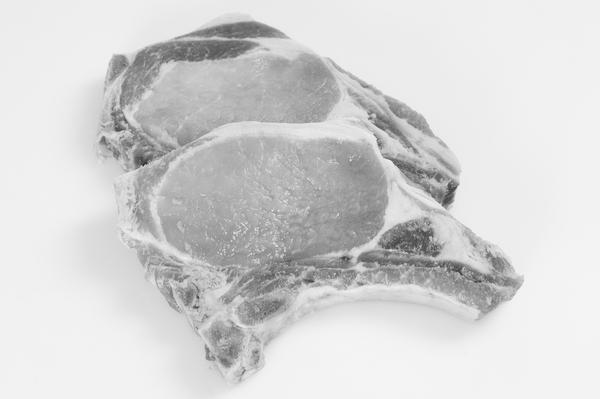

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

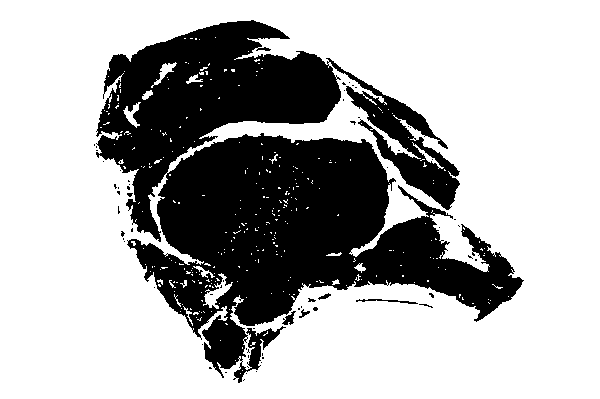

In [ ]:
# threshold input image as mask
mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(mask)